## Vivek Divakarla
### Analyzing the Relationship Between Various Features and Tennis Match Victories

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
atp23 = pd.read_csv('atp_matches_2023_update.csv')
atp23.head()

,vivekmatchid,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2239,2023-0360,Marrakech,Clay,32,A,20230403,289,106148,NaN,...,3.0,0.0,0.0,1.0,0.0,1.0,82.0,675.0,207.0,283.0
1,2677,2023-0322,Geneva,Clay,32,A,20230522,296,100644,3.0,...,16.0,7.0,3.0,3.0,3.0,5.0,27.0,1360.0,59.0,839.0
2,2141,2023-0422,Cincinnati Masters,Hard,64,M,20230814,287,126203,9.0,...,6.0,0.0,0.0,2.0,0.0,2.0,9.0,3605.0,66.0,839.0
3,773,2023-0403,Miami Masters,Hard,128,M,20230320,215,106121,NaN,...,7.0,3.0,4.0,3.0,1.0,3.0,97.0,583.0,72.0,736.0
4,982,2023-0418,Washington,Hard,64,A,20230731,247,133297,NaN,...,8.0,7.0,5.0,3.0,0.0,0.0,99.0,608.0,90.0,683.0


In [3]:
#split the dataframe in two, based on the winning player and losing player
winners = atp23[["vivekmatchid", "tourney_id", "tourney_name", "surface", "draw_size", "tourney_level", "tourney_date", "match_num", "winner_id", "winner_seed", "winner_entry", "winner_name", "winner_hand", "winner_ht", "winner_ioc", "winner_age", "score", "best_of", "round", "minutes", "w_ace", "w_df", "w_svpt", "w_1stIn", "w_1stWon", "w_2ndWon","w_SvGms", "w_bpSaved", "w_bpFaced","winner_rank", "winner_rank_points"]]
winners = winners.rename(columns={"winner_id": "id", "winner_seed": "seed", "winner_entry": "entry", "winner_name": "name", "winner_hand": "hand", "winner_ht": "ht", "winner_ioc": "ioc", "winner_age": "age", "w_ace": "ace", "w_df": "df", "w_svpt": "svpt", "w_1stIn": "first_in", "w_1stWon": "first_won", "w_2ndWon": "second_won", "w_SvGms": "sv_gms", "w_bpSaved": "bpSaved", "w_bpFaced": "bpFaced", "winner_rank": "rank", "winner_rank_points": "rank_points"})
winners['match_won'] = 1

losers = atp23[["vivekmatchid", "tourney_id", "tourney_name", "surface", "draw_size", "tourney_level", "tourney_date", "match_num", "loser_id", "loser_seed", "loser_entry", "loser_name", "loser_hand", "loser_ht", "loser_ioc", "loser_age", "score", "best_of", "round", "minutes", "l_ace", "l_df", "l_svpt", "l_1stIn", "l_1stWon", "l_2ndWon","l_SvGms", "l_bpSaved", "l_bpFaced","loser_rank", "loser_rank_points"]]
losers = losers.rename(columns={"loser_id":"id", "loser_seed":"seed", "loser_entry":"entry", "loser_name":"name", "loser_hand":"hand", "loser_ht":"ht", "loser_ioc":"ioc", "loser_age":"age", "l_ace":"ace", "l_df":"df", "l_svpt":"svpt", "l_1stIn":"first_in", "l_1stWon":"first_won", "l_2ndWon":"second_won", "l_SvGms":"sv_gms", "l_bpSaved":"bpSaved", "l_bpFaced":"bpFaced", "loser_rank":"rank", "loser_rank_points":"rank_points"})
losers["match_won"] = 0

In [4]:
winners.head()


,vivekmatchid,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,id,seed,...,svpt,first_in,first_won,second_won,sv_gms,bpSaved,bpFaced,rank,rank_points,match_won
0,2239,2023-0360,Marrakech,Clay,32,A,20230403,289,106148,NaN,...,5.0,3.0,3.0,1.0,1.0,0.0,0.0,82.0,675.0,1
1,2677,2023-0322,Geneva,Clay,32,A,20230522,296,100644,3.0,...,10.0,9.0,7.0,1.0,2.0,0.0,0.0,27.0,1360.0,1
2,2141,2023-0422,Cincinnati Masters,Hard,64,M,20230814,287,126203,9.0,...,12.0,10.0,10.0,2.0,3.0,0.0,0.0,9.0,3605.0,1
3,773,2023-0403,Miami Masters,Hard,128,M,20230320,215,106121,NaN,...,13.0,4.0,1.0,8.0,2.0,1.0,1.0,97.0,583.0,1
4,982,2023-0418,Washington,Hard,64,A,20230731,247,133297,NaN,...,13.0,6.0,3.0,4.0,2.0,1.0,2.0,99.0,608.0,1


In [5]:
losers.head()


,vivekmatchid,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,id,seed,...,svpt,first_in,first_won,second_won,sv_gms,bpSaved,bpFaced,rank,rank_points,match_won
0,2239,2023-0360,Marrakech,Clay,32,A,20230403,289,106220,NaN,...,4.0,3.0,0.0,0.0,1.0,0.0,1.0,207.0,283.0,0
1,2677,2023-0322,Geneva,Clay,32,A,20230522,296,200059,NaN,...,22.0,16.0,7.0,3.0,3.0,3.0,5.0,59.0,839.0,0
2,2141,2023-0422,Cincinnati Masters,Hard,64,M,20230814,287,105583,NaN,...,8.0,6.0,0.0,0.0,2.0,0.0,2.0,66.0,839.0,0
3,773,2023-0403,Miami Masters,Hard,128,M,20230320,215,126239,NaN,...,16.0,7.0,3.0,4.0,3.0,1.0,3.0,72.0,736.0,0
4,982,2023-0418,Washington,Hard,64,A,20230731,247,200059,NaN,...,13.0,8.0,7.0,5.0,3.0,0.0,0.0,90.0,683.0,0


In [6]:
#merge the dataframes together
frames = [winners, losers]

result = pd.concat(frames)
result = result.sort_values(by=['vivekmatchid'])
result.head()


,vivekmatchid,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,id,seed,...,svpt,first_in,first_won,second_won,sv_gms,bpSaved,bpFaced,rank,rank_points,match_won
2730,1,2023-M-DC-2023-FLS-1-A-M-CAN-CHI-01,Davis Cup Finals RR: CAN vs CHI,Hard,2,D,20230916,1,126214,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0,492.0,0
2730,1,2023-M-DC-2023-FLS-1-A-M-CAN-CHI-01,Davis Cup Finals RR: CAN vs CHI,Hard,2,D,20230916,1,200008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,307.0,1
2731,2,2023-M-DC-2023-FLS-1-A-M-CAN-ITA-01,Davis Cup Finals RR: CAN vs ITA,Hard,2,D,20230913,1,132283,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,1140.0,0
2731,2,2023-M-DC-2023-FLS-1-A-M-CAN-ITA-01,Davis Cup Finals RR: CAN vs ITA,Hard,2,D,20230913,1,200008,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0,307.0,1
2732,3,2023-M-DC-2023-FLS-1-A-M-CAN-SWE-01,Davis Cup Finals RR: CAN vs SWE,Hard,2,D,20230914,1,209863,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,334.0,155.0,0


In [7]:
#Create new statistics which will be used as features
result['ace%'] = result['ace']/result['svpt']
result['df%'] = result['df']/result['svpt']
result['first_in%'] = result['first_in']/result['svpt']
result['first_won%'] = result['first_won']/result['first_in']
result['second_in'] = result['svpt'] - result['first_in']
result['second_won%'] = result['second_won']/result['second_in']
result['bpSaved%'] = result['bpSaved']/result['bpFaced']


In [8]:
#Drop the rows that contain null values for key statistics
result = result.dropna(subset=['ace%', 'df%', 'first_in%', 'age', 'ht'])


In [9]:
#Split the dataframe by Surface
hard_court = result[result['surface'].str.contains('Hard')] 
clay_court = result[result['surface'].str.contains('Clay')]
grass_court = result[result['surface'].str.contains('Grass')]

In [10]:
#Correlation DF for all matches
features = ['ht', 'age', 'ace','df','svpt','first_in%','first_won%','second_won%','ace%',
            'df%','bpSaved','bpFaced']
correlationlist = []
for x in features:
    r = np.corrcoef(result['match_won'], result[x])
    correlationlist.append((x,r[0,1]))
    
correlationdf = pd.DataFrame(correlationlist, columns =['Feature','Correlation'])

print(correlationdf) 


        Feature  Correlation
0            ht     0.074464
1           age    -0.065918
2           ace     0.145545
3            df    -0.132389
4          svpt    -0.055421
5     first_in%     0.104127
6    first_won%     0.496429
7   second_won%     0.461763
8          ace%     0.235932
9           df%    -0.140987
10      bpSaved    -0.205386
11      bpFaced    -0.391795


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'bpFaced'),
  Text(1, 0, 'bpSaved'),
  Text(2, 0, 'df%'),
  Text(3, 0, 'df'),
  Text(4, 0, 'age'),
  Text(5, 0, 'svpt'),
  Text(6, 0, 'ht'),
  Text(7, 0, 'first_in%'),
  Text(8, 0, 'ace'),
  Text(9, 0, 'ace%'),
  Text(10, 0, 'second_won%'),
  Text(11, 0, 'first_won%')])

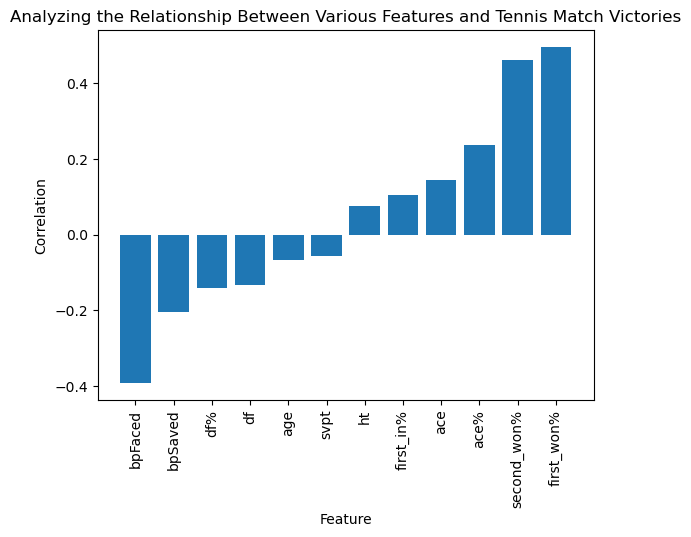

In [11]:
#Sort Values by Correlation and Graph
correlationdf = correlationdf.sort_values(by=['Correlation'])
fig, ax = plt.subplots()
ax.bar(correlationdf['Feature'], correlationdf['Correlation'])
ax.set_ylabel('Correlation')
ax.set_xlabel('Feature')
ax.set_title('Analyzing the Relationship Between Various Features and Tennis Match Victories')
plt.xticks(rotation=90)

In [12]:
#Correlation DF for all hard court matches
features = ['ht', 'age', 'ace','df','svpt','first_in%','first_won%','second_won%','ace%',
            'df%','bpSaved','bpFaced']
hard_correlationlist = []
for x in features:
    r = np.corrcoef(hard_court['match_won'], hard_court[x])
    hard_correlationlist.append((x,r[0,1]))
    
hard_correlationdf = pd.DataFrame(hard_correlationlist, columns =['Feature','Correlation'])

print(hard_correlationdf) 

        Feature  Correlation
0            ht     0.080130
1           age    -0.054375
2           ace     0.162264
3            df    -0.136171
4          svpt    -0.066021
5     first_in%     0.111256
6    first_won%     0.497780
7   second_won%     0.474292
8          ace%     0.269126
9           df%    -0.144236
10      bpSaved    -0.204014
11      bpFaced    -0.395971


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'bpFaced'),
  Text(1, 0, 'bpSaved'),
  Text(2, 0, 'df%'),
  Text(3, 0, 'df'),
  Text(4, 0, 'svpt'),
  Text(5, 0, 'age'),
  Text(6, 0, 'ht'),
  Text(7, 0, 'first_in%'),
  Text(8, 0, 'ace'),
  Text(9, 0, 'ace%'),
  Text(10, 0, 'second_won%'),
  Text(11, 0, 'first_won%')])

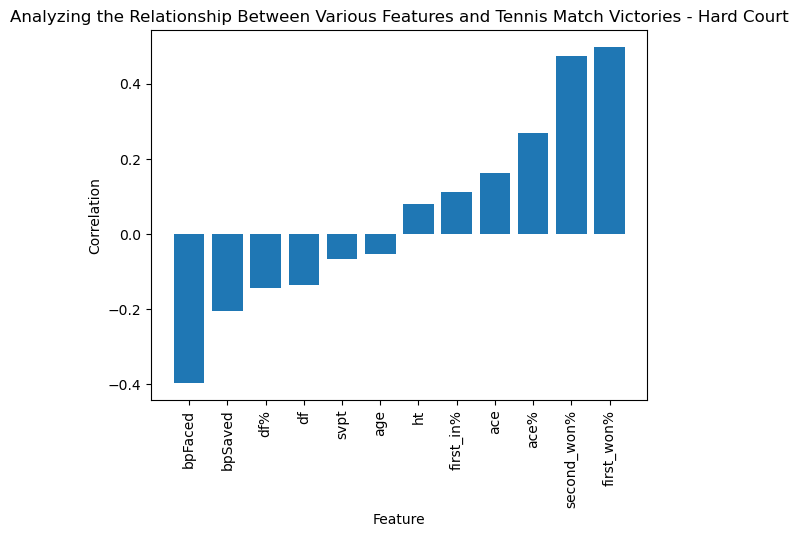

In [13]:
#Sort Values for All Hard Court Matches and Graph
hard_correlationdf = hard_correlationdf.sort_values(by=['Correlation'])
fig, ax = plt.subplots()
ax.bar(hard_correlationdf['Feature'], hard_correlationdf['Correlation'])
ax.set_ylabel('Correlation')
ax.set_xlabel('Feature')
ax.set_title('Analyzing the Relationship Between Various Features and Tennis Match Victories - Hard Court')
plt.xticks(rotation=90)

In [14]:
#Correlation DF for all clay court matches
features = ['ht', 'age', 'ace','df','svpt','first_in%','first_won%','second_won%','ace%',
            'df%','bpSaved','bpFaced']
clay_correlationlist = []
for x in features:
    r = np.corrcoef(clay_court['match_won'], clay_court[x])
    clay_correlationlist.append((x,r[0,1]))
    
clay_correlationdf = pd.DataFrame(clay_correlationlist, columns =['Feature','Correlation'])

print(clay_correlationdf) 

        Feature  Correlation
0            ht     0.062774
1           age    -0.103150
2           ace     0.126205
3            df    -0.160770
4          svpt    -0.041787
5     first_in%     0.100454
6    first_won%     0.515824
7   second_won%     0.458850
8          ace%     0.206670
9           df%    -0.174595
10      bpSaved    -0.191487
11      bpFaced    -0.379708


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'bpFaced'),
  Text(1, 0, 'bpSaved'),
  Text(2, 0, 'df%'),
  Text(3, 0, 'df'),
  Text(4, 0, 'age'),
  Text(5, 0, 'svpt'),
  Text(6, 0, 'ht'),
  Text(7, 0, 'first_in%'),
  Text(8, 0, 'ace'),
  Text(9, 0, 'ace%'),
  Text(10, 0, 'second_won%'),
  Text(11, 0, 'first_won%')])

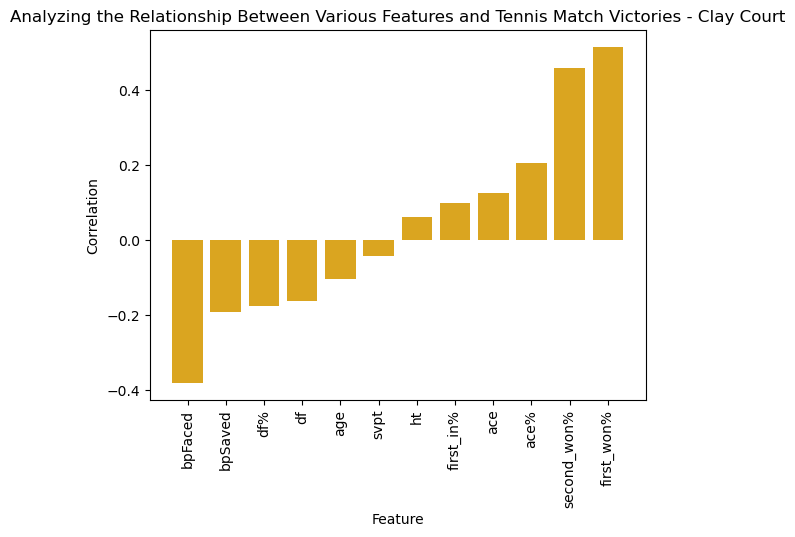

In [15]:
#Sort Values for All Clay Court Matches and Graph
clay_correlationdf = clay_correlationdf.sort_values(by=['Correlation'])
fig, ax = plt.subplots()
ax.bar(clay_correlationdf['Feature'], clay_correlationdf['Correlation'], color='goldenrod')
ax.set_ylabel('Correlation')
ax.set_xlabel('Feature')
ax.set_title('Analyzing the Relationship Between Various Features and Tennis Match Victories - Clay Court')
plt.xticks(rotation=90)

In [16]:
#Correlation DF for all grass court matches
features = ['ht', 'age', 'ace','df','svpt','first_in%','first_won%','second_won%','ace%',
            'df%','bpSaved','bpFaced']
grass_correlationlist = []
for x in features:
    r = np.corrcoef(grass_court['match_won'], grass_court[x])
    grass_correlationlist.append((x,r[0,1]))
    
grass_correlationdf = pd.DataFrame(grass_correlationlist, columns =['Feature','Correlation'])

print(grass_correlationdf) 

        Feature  Correlation
0            ht     0.078441
1           age    -0.023273
2           ace     0.164833
3            df    -0.065110
4          svpt    -0.051674
5     first_in%     0.079589
6    first_won%     0.521047
7   second_won%     0.407597
8          ace%     0.236466
9           df%    -0.041134
10      bpSaved    -0.255813
11      bpFaced    -0.425026


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'bpFaced'),
  Text(1, 0, 'bpSaved'),
  Text(2, 0, 'df'),
  Text(3, 0, 'svpt'),
  Text(4, 0, 'df%'),
  Text(5, 0, 'age'),
  Text(6, 0, 'ht'),
  Text(7, 0, 'first_in%'),
  Text(8, 0, 'ace'),
  Text(9, 0, 'ace%'),
  Text(10, 0, 'second_won%'),
  Text(11, 0, 'first_won%')])

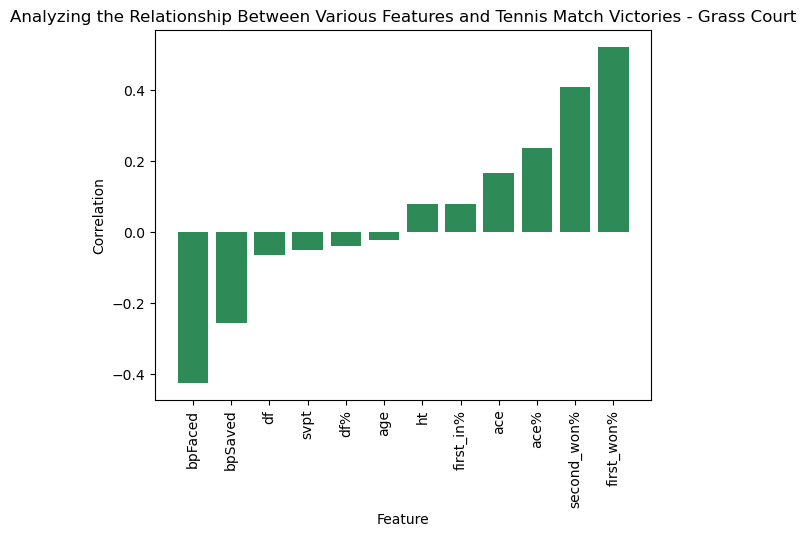

In [17]:
#Sort Values for All Grass Court Matches and Graph
grass_correlationdf = grass_correlationdf.sort_values(by=['Correlation'])
fig, ax = plt.subplots()
ax.bar(grass_correlationdf['Feature'], grass_correlationdf['Correlation'], color='seagreen')
ax.set_ylabel('Correlation')
ax.set_xlabel('Feature')
ax.set_title('Analyzing the Relationship Between Various Features and Tennis Match Victories - Grass Court')
plt.xticks(rotation=90)